# pytorch 基础

本课内容包括
1. 基本的pytorch入门
2. pytorch中向量、导数、偏导操作，参考之前线性代数以及微积分
3. 基于pytorch构建一个线性回归网络
4. 基于pytorch实现class1 对图片的分类以及优化

---

参考资料

1. [ws university pytorch introudction](https://courses.cs.washington.edu/courses/cse446/19au/section9.html)
2. [li hong yi](https://www.youtube.com/watch?v=kQeezFrNoOg)
3. [pytorch homepage](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html)

## 1.安装pytorch

与tensorflow相同，pytorch分为cpu版本与gpu版本，官网有相对于安装代码
[安装页面](https://pytorch.org/)




pytorch 中torch的作用类似numpy，包括创建数组，进行线性代数运算等，但torch还可以直接进行求导运算

numpy 与 torch之间也可以相互转化

例如numpy中创建数组与torch中创建tensor张量对比

```python 
np.array([12,3])
torch.tensor([12,3])
```

1. array与tensor相互转换


#### 张量

之前的深度学习模型中，基于numpy构建模型，但在pytorch与tensorflow等深度学习框架中，使用的是tensor（张量）概念。

张量是一种数据结构，可以认为是一种高维数组。结合线性代数，所对照的张量

* 标量——0阶张量
* 向量——1阶张量
* 矩阵——2阶张量
* 多维向量组——多阶张量

---
不同于tensorflow，pytorch中张量表达与计算与numpy基本相同

In [1]:
!pip install numpy

In [2]:
import numpy as np 
import torch 
if __name__ == '__main__':
    x_tensor=torch.tensor([2,3,2])
    print(type(x_tensor))
    print(x_tensor)
    y_array=x_tensor.numpy()#转换tensor到array
    print(type(y_array))
    print(y_array)

    x_arrray=np.array([[2,2,3],[2,2,2]])
    print(type(x_arrray))
    print(x_arrray.shape)
    y_tensor=torch.from_numpy(x_arrray)
    print(type(y_tensor))
    print(y_tensor.shape)

<class 'torch.Tensor'>
tensor([2, 3, 2])
<class 'numpy.ndarray'>
[2 3 2]
<class 'numpy.ndarray'>
(2, 3)
<class 'torch.Tensor'>
torch.Size([2, 3])


2. tensor 中的线性代数计算
tensor中的计算与numpy中基本一致，包括加减，内积,求norm等。

例如以下代码模拟了一个神经网络affine层中的输入值与权参相乘与偏参相加的计算

In [3]:
# 注意，torch在求norm时，要求数据必须为float数据，故在开始就必须制定向量的数据类型
x=torch.tensor([2,3,3],dtype=float)
w=torch.tensor([[2,2],[1,2],[3,2]],dtype=float)
b=torch.tensor([1,2],dtype=float)
z=x@w+b
print(z)
print(torch.norm(z))

tensor([17., 18.], dtype=torch.float64)
tensor(24.7588, dtype=torch.float64)


tensor中正态分布、随机值等的生成与numpy也一致

```python
torch.rand(维度1数，维度2数，维度3数)
```


In [4]:
x=torch.rand(2,2,2,2)
print(x)
x_a=np.random.rand(2,2,2,2,2)
print(x_a.shape)
print(x_a) 


tensor([[[[0.6316, 0.6812],
          [0.0719, 0.0886]],

         [[0.1724, 0.3346],
          [0.3225, 0.6778]]],


        [[[0.1743, 0.5017],
          [0.4886, 0.4864]],

         [[0.0021, 0.8068],
          [0.7418, 0.7583]]]])
(2, 2, 2, 2, 2)
[[[[[0.30472206 0.6525437 ]
    [0.12283661 0.70027821]]

   [[0.94703946 0.4867304 ]
    [0.87053731 0.5477201 ]]]


  [[[0.83096619 0.50488261]
    [0.78357508 0.22997983]]

   [[0.66894109 0.04340453]
    [0.45454528 0.73883622]]]]



 [[[[0.98431324 0.95452436]
    [0.4165234  0.36339239]]

   [[0.60161399 0.03956084]
    [0.8761482  0.94459795]]]


  [[[0.5187272  0.0590035 ]
    [0.60466417 0.44517882]]

   [[0.31644838 0.28110669]
    [0.31394035 0.191644  ]]]]]


tensor 形状改变
* Tensor.view-改变形状
* Tensor.flatten-降维为1维

We can use the Tensor.view() function to reshape tensors similarly to numpy.reshape()

It can also automatically calculate the correct dimension if a -1 is passed in. This is useful if we are working with batches, but the batch size is unknown.
 
 

In [6]:
batch=1000
img_x=28
img_y=28
#生成一个（1000，28，29）形状的张量，模拟1000张28*28图像
x=torch.rand(batch,img_x,img_y)
print(x.shape)
#将x变更为(1000,784)形状的张量
x2=x.view(batch,img_x*img_y)
print(x2.shape)
#当不确定某维度的大小（batch大小），可以设为-1，torch将自动赋值
x3=x.view(batch,-1)
print(x3.shape)
x3=x.view(-1,784)
print(x3.shape)
#将张量降维为1维
x_fallten=torch.flatten(x)
print(x_fallten.shape)


torch.Size([1000, 28, 28])
torch.Size([1000, 784])
torch.Size([1000, 784])
torch.Size([1000, 784])
torch.Size([784000])


## Computation graphs 计算图

参考
* [computation graph](https://colah.github.io/posts/2015-08-Backprop/)


What's special about PyTorch's tensor object is that it implicitly creates a computation graph in the background. A computation graph is a a way of writing a mathematical expression as a graph. There is an algorithm to compute the gradients of all the variables of a computation graph in time on the same order it is to compute the function itself.

---

pytorch可以自动实现计算图，Backpropagation反向传播

<img src="figs\tree-def.png" height="50%" width="50%">

例如上图对应计算 $e=(a+b) \times (1+b)$，求$a=1,b=2$时的反向传播

为此，在对tensor复制时候，必须设置**requires_grad=True**从而pytroch将会保留计算图
>we set requires_grad=True to let PyTorch know to keep the graph


In [7]:
a=torch.tensor(1.0,requires_grad=True)
b=torch.tensor(2.0,requires_grad=True)
c=a+b
d=1+b
e=c*d
print(c)
print(d)
print(e)


tensor(3., grad_fn=<AddBackward0>)
tensor(3., grad_fn=<AddBackward0>)
tensor(9., grad_fn=<MulBackward0>)


## PyTorch as an auto grad framework
Now that we have seen that PyTorch keeps the graph around for us, let's use it to compute some gradients for us.

Consider the function  $f(x)=(x−2)^2$
 .

Q: Compute  $\frac{df(x)}{dx}$
  and then compute  $f′(1)$
 .

We make a backward() call on the leaf variable (y) in the computation, computing all the gradients of y at once.

---
实际就是pytorch实现了链式求导：
1. pytorch 中，张量具有require_grad属性，该属性为True则将跟踪对此张量的所有计算。
2. 完成正向传播计算后，可以对计算结果调用backward（）方法，将自动计算所有梯度，并保存至grad属性中
3. 张量的grad_fn属性将指向运算生成该张量的方法。
通过pytorch中backward可以求得导函数结果


In [5]:
def f(x):
    return (x-2)**2
x=torch.tensor(1.0,requires_grad=True)
y=f(x)
print("正向传播forward:",y)
y.backward()
print("反向传播结果",x.grad)
print(y.grad_fn)


正向传播forward: tensor(1., grad_fn=<PowBackward0>)
反向传播结果 tensor(-2.)


可以设置一个嵌套函数，并求得不同层变量的导数
设
$$y=x^2 \rightarrow z=y+w \rightarrow e=z\times 3+5$$
其中$x=2,w=3$求位于链式求导叶子节点的$\frac{de}{dx},\frac{de}{dw}$

In [10]:
def y(x):
    return x**2
def z(y,w):
    return y+w
def e(z):
    return z*3

if __name__ == '__main__':
    x=torch.tensor(2.0,requires_grad=True)
    w=torch.tensor(3.0,requires_grad=True)
    ##forwad
    y=y(x)
    z=z(y,w)
    e=e(z)
    print("forward result:",e)
    #backward 
    e.backward()
    print("e函数求梯度方法：",e.grad_fn)
    print("y函数求梯度方法：",y.grad_fn)
    print("x的梯度",x.grad)
    print("w的梯度",w.grad)
    

forward result: tensor(21., grad_fn=<MulBackward0>)
e函数求梯度方法： <MulBackward0 object at 0x00000298310EF0A0>
y函数求梯度方法： <PowBackward0 object at 0x00000298310EF0A0>
x的梯度 tensor(12.)
w的梯度 tensor(3.)


It can also find gradients of functions.

Let  $w=[w_1,w_2]^T$
 
Consider  $(w)=2w_1w_2+w_2\cos(w_1)$
 
Q: Compute  $∇wg(w)$
  and verify $ ∇wg([π,1])=[2,π−1]^T$

---

进一步求得偏导数，并构成梯度向量

 

In [11]:
def g(w):
    return 2*w[0]*w[1]+w[1]*torch.cos(w[0])
if __name__ == '__main__':
    w=torch.tensor([torch.pi,1],dtype=float,requires_grad=True)
    print("forwad")
    g=g(w)
    print(g)
    print("backward")
    g.backward()
    print(w.grad)

forwad
tensor(5.2832, dtype=torch.float64, grad_fn=<AddBackward0>)
backward
tensor([2.0000, 5.2832], dtype=torch.float64)


基于以上torch对backward，梯度计算方式，可以结合实现梯度下降法；

---
Using the gradients
Now that we have gradients, we can use our favorite optimization algorithm: gradient descent!

Let  $f$
  the same function we defined above.

Q: What is the value of $ x$
  that minimizes $ f$?

  ---

  注意在此

In [6]:
def f(x):
    return (x-2)**2

if __name__=='__main__':
    iter=100
    learning_rate=0.8
    x=torch.tensor([100.0],requires_grad=True)
    
    for i in range(iter):
        y=f(x)
        y.backward()
        #计算时，必须使用x.data
        x.data=x.data-(x.grad)*learning_rate
        print(x.data)
        
        x.grad.zero_() 


tensor([-56.8000])
tensor([37.2800])
tensor([-19.1680])
tensor([14.7008])
tensor([-5.6205])
tensor([6.5723])
tensor([-0.7434])
tensor([3.6460])
tensor([1.0124])
tensor([2.5926])
tensor([1.6445])
tensor([2.2133])
tensor([1.8720])
tensor([2.0768])
tensor([1.9539])
tensor([2.0276])
tensor([1.9834])
tensor([2.0100])
tensor([1.9940])
tensor([2.0036])
tensor([1.9979])
tensor([2.0013])
tensor([1.9992])
tensor([2.0005])
tensor([1.9997])
tensor([2.0002])
tensor([1.9999])
tensor([2.0001])
tensor([2.0000])
tensor([2.0000])
tensor([2.0000])
tensor([2.0000])
tensor([2.0000])
tensor([2.0000])
tensor([2.0000])
tensor([2.0000])
tensor([2.0000])
tensor([2.0000])
tensor([2.0000])
tensor([2.0000])
tensor([2.0000])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2

基于Pytorch建立线性方程

1. 构建基本的线性方程
2. 描述方程各个部分

---
Linear Module 
 
The bread and butter of modules is the Linear module which does a linear transformation with a bias. It takes the input and output dimensions as parameters, and creates the weights in the object.

Unlike how we initialized our  w manually, the Linear module automatically initializes the weights randomly. 

For minimizing non convex loss functions (e.g. training neural networks), initialization is important and can affect results. 

If training isn't working as well as expected, one thing to try is manually initializing the weights to something different from the default. PyTorch implements some common initializations in torch.nn.init.

---

pytorch 在linear层将会自动初始化权参、偏参的初始值，通过torch.nn.init 实现。

### torch.optim 优化函数
PyTorch implements a number of gradient-based optimization methods in torch.optim, including Gradient Descent.

* At the minimum, it takes in the model parameters and a learning rate.

* Optimizers do not compute the gradients for you, so you must call backward() yourself.

* You also must call the optim.zero_grad() function before calling backward() since by default

 * PyTorch does and inplace add to the .grad member variable rather than overwriting it.

* This does both the detach_() and zero_() calls on all tensor's grad variables.

torch.Size([20, 1])
通过一次forwad后得到y predict
模型中参数： <generator object Module.parameters at 0x00000177DAECBCA0>
初始权参值: Parameter containing:
tensor([[-0.8239]], requires_grad=True)
初始偏参值: Parameter containing:
tensor([0.5942], requires_grad=True)
第 0 次epoch
第 1 次梯度下降后
模型中权参梯度： tensor([[-382.3724]])
模型中偏参梯度 tensor([-110.8050])
第 2 次梯度下降后
模型中权参梯度： tensor([[-374.1622]])
模型中偏参梯度 tensor([-108.4517])
第 3 次梯度下降后
模型中权参梯度： tensor([[-366.1281]])
模型中偏参梯度 tensor([-106.1488])
第 4 次梯度下降后
模型中权参梯度： tensor([[-358.2664]])
模型中偏参梯度 tensor([-103.8954])
第 5 次梯度下降后
模型中权参梯度： tensor([[-350.5734]])
模型中偏参梯度 tensor([-101.6902])
第 6 次梯度下降后
模型中权参梯度： tensor([[-343.0453]])
模型中偏参梯度 tensor([-99.5324])
第 7 次梯度下降后
模型中权参梯度： tensor([[-335.6789]])
模型中偏参梯度 tensor([-97.4209])
第 8 次梯度下降后
模型中权参梯度： tensor([[-328.4704]])
模型中偏参梯度 tensor([-95.3546])
第 9 次梯度下降后
模型中权参梯度： tensor([[-321.4167]])
模型中偏参梯度 tensor([-93.3327])
第 10 次梯度下降后
模型中权参梯度： tensor([[-314.5142]])
模型中偏参梯度 tensor([-91.3541])
第 11 次梯度下降后
模型中权参梯度： tensor([[-307.7598]])
模型中偏参梯

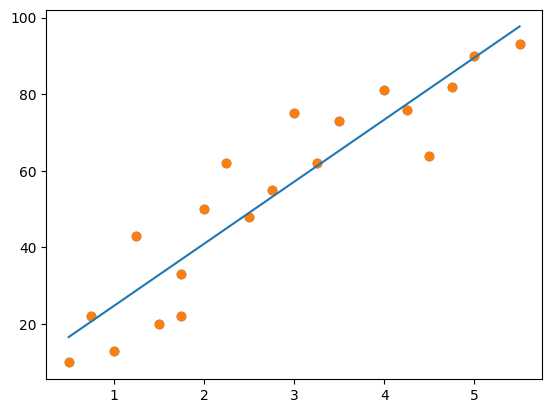

In [7]:
import torch as t 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn
class LinerModel(nn.Module):
    def __init__(self):
        super(LinerModel, self).__init__()
        self.linear=nn.Linear(in_features=1,out_features=1)
        self.weight=self.linear.weight
        self.bias=self.linear.bias
    
    def forward(self,x):
        return self.linear(x)
    
    def getParamters(self):
        return self.weight,self.bias
if  __name__ == '__main__':
    
 

    #plt.scatter(x,y)
    x_t=t.tensor([[0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50]]).T
    y_t=t.tensor([[10,  22,  13,  43,  20,  22,  33,  50,  62, 48,  55,  75,  62,  73,  81,  76,  64,  82,  90,  93]]).T
    x_n=x_t.numpy().T
    y_n=y_t.numpy().T
    plt.scatter(x_n,y_n)
    print(x_t.shape)
    linear_module=LinerModel()
    y_pred=linear_module.forward(x_t)
    print("通过一次forwad后得到y predict")
    weight,bias=linear_module.getParamters()#获得模型的权参、偏参
    print("模型中参数：",linear_module.parameters())
    print("初始权参值:",weight)
    print("初始偏参值:",bias)
    ########################实例化损失函数，优化函数########################################
    loss_fn=nn.MSELoss()#定义均方误差函数作为损失函数
    optimizer=t.optim.SGD(linear_module.parameters(),lr=0.001)#使用SGD优化函数，对inear_module.parameters()中权参、偏参进行梯度下降法优化，学习率为0.001
    
    iter=1000
    i=0
    for epoch in range(iter):#循环10000次epoch
        print("第",epoch,"次epoch")
        for x,y in zip(x_t,y_t):#对训练集中每一个值都投入模型运算并求得对应梯度，并运行一次梯度下降，完成一个epoch
            i+=1
            y_predict=linear_module(x_t)
            y_predict=y_predict.to(t.float32)#转换为float
            y_t=y_t.to(t.float32)
            loss=loss_fn(y_predict, y_t)
            optimizer.zero_grad()#清空上次的梯度积累
            loss.backward()#损失函数进行backward反向传播
            if iter>900:
                
                print("第",i,"次梯度下降后")
                print("模型中权参梯度：",linear_module.weight.grad)
                print("模型中偏参梯度",linear_module.bias.grad)
            optimizer.step()#根据计算得到的梯度开始梯度下降更新即W=W-∇w*learningrate
    
    ################################输出最终优化的权参和偏参##############################################
    print("优化后得到权参、偏参分别为：",list(linear_module.named_parameters()))
    y_predict=linear_module(x_t).detach().numpy()#通过模型进行预测.detach()实现返回一个新的tensor，从当前计算图中分离下来的，但是仍指向原变量的存放位置,不同之处只是requires_grad为false，得到的这个tensor永远不需要计算其梯度，不具有grad。
    plt.scatter(x_n,y_n)
    plt.plot(x_t,y_predict)
    
    

In [14]:
d_in = 3
d_out = 4
linear_module = nn.Linear(1, d_out)

example_tensor = torch.tensor([[1.,2,3]]).T
# applys a linear transformation to the data
transformed = linear_module(example_tensor)
print('example_tensor', example_tensor.shape)
print('transormed', transformed.shape)
print()
print('We can see that the weights exist in the background\n')
print('W:', linear_module.weight)
print('b:', linear_module.bias)

example_tensor torch.Size([3, 1])
transormed torch.Size([3, 4])

We can see that the weights exist in the background

W: Parameter containing:
tensor([[-0.0135],
        [ 0.6240],
        [-0.4830],
        [-0.4047]], requires_grad=True)
b: Parameter containing:
tensor([ 0.9938,  0.7169, -0.3523, -0.5634], requires_grad=True)


模型的改进

以上模型没有加入激活函数，只是一个简单的一层线性全连接网络。

以下改进模型，加入激活层，使用relu激活函数：

---

Activation functions
PyTorch implements a number of activation functions including but not limited to ReLU, Tanh, and Sigmoid. Since they are modules, they need to be instantiated.

---

pytorch中，激活层的使用与之前numpy构建相似，首先实例化一个激活函数，正向传播全连接层input的数据后，得到激活值，传递给下一个全连接层。

In [15]:
relu_fn=nn.ReLU()#实例化Relu函数
x=t.randn(2,dtype=float)
print(x)
print("relu 激活函数很简单，即如果x>0则输出x反之输出0")
y=relu_fn.forward(x)
print(y)



tensor([-0.6202, -1.7170], dtype=torch.float64)
relu 激活函数很简单，即如果x>0则输出x反之输出0
tensor([0., 0.], dtype=torch.float64)


实现将激活函数加入之前线性层之后，注意输出层也必须为一个线性层，而后在外部使用平均误差函数

---
出现问题
1. 单独将数据放入GPU无法训练，还必须将model放入gpu
```python
    x_t=x_t.to(device)#将数据移动到gpu
    y_t=y_t.to(device)#将数据运动到gpu
    linear_module=LinerModel()
    linear_module.to(device)#模型也必须移动到GPU
```
2. 如果想把CUDA tensor格式的数据改成numpy时，需要先将其转换成cpu float-tensor随后再转到numpy格式。 numpy不能读取CUDA tensor 需要将它转化为 CPU tensor
```python
    x_n=x_t.cpu().numpy().T
    y_n=y_t.cpu().numpy().T
```

torch.Size([20, 1])
current device cuda
cuda:0
torch.Size([20, 1])
通过一次forwad后得到y predict
模型中参数： <generator object Module.parameters at 0x00000177D24B6AB0>
初始权参值: Parameter containing:
tensor([[-0.3427],
        [ 0.6743],
        [-0.1665],
        [ 0.4555],
        [ 0.8465],
        [-0.4739],
        [ 0.3787],
        [-0.1055],
        [-0.2284],
        [-0.6538]], device='cuda:0', requires_grad=True)
初始偏参值: Parameter containing:
tensor([-0.8712, -0.2708,  0.8220, -0.7317, -0.0776,  0.3749, -0.4017, -0.3085,
         0.4866, -0.1060], device='cuda:0', requires_grad=True)
优化后得到权参、偏参分别为： [('weight', Parameter containing:
tensor([[-0.3427],
        [ 1.4788],
        [-2.1063],
        [ 0.9439],
        [ 1.7391],
        [-0.5829],
        [ 0.7229],
        [-0.1055],
        [-0.9022],
        [-0.6538]], device='cuda:0', requires_grad=True)), ('bias', Parameter containing:
tensor([-0.8712,  2.5864,  6.3171,  0.1219,  3.6189,  0.5830,  0.4815, -0.3085,
         3.9841, -0.1060

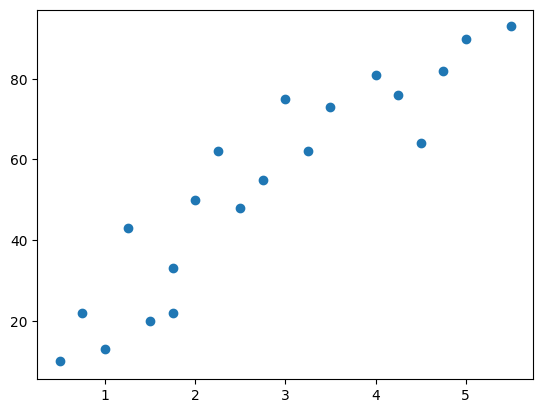

In [8]:
import torch as t 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn
class LinerModel(nn.Module):
    def __init__(self):
        super(LinerModel, self).__init__()
        self.linear1=nn.Linear(in_features=1,out_features=10)
        self.relu1=nn.ReLU()
        self.linear2=nn.Linear(in_features=10,out_features=1)
        self.weight=self.linear1.weight
        self.bias=self.linear1.bias
    
    def forward(self,x):
        x=self.linear1(x)
        x=self.relu1(x)
        x=self.linear2(x)
        return x
    
    def getParamters(self):
        return self.weight,self.bias
if  __name__ == '__main__':
    
 

    #plt.scatter(x,y)
    x_t=t.tensor([[0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50]]).T
    print(x_t.shape)
    y_t=t.tensor([[10,  22,  13,  43,  20,  22,  33,  50,  62, 48,  55,  75,  62,  73,  81,  76,  64,  82,  90,  93]]).T
    
    device="cuda" if t.cuda.is_available() else "cpu"
    print("current device",device)
    x_t=x_t.to(device)#将数据移动到gpu
    y_t=y_t.to(device)#将数据运动到gpu
    
    print(x_t.device)
    x_n=x_t.cpu().numpy().T
    y_n=y_t.cpu().numpy().T
    print(x_t.shape)
    linear_module=LinerModel()
    linear_module.to(device)#模型也必须移动到GPU
    y_pred=linear_module.forward(x_t)
    print("通过一次forwad后得到y predict")
    weight,bias=linear_module.getParamters()
    print("模型中参数：",linear_module.parameters())
    print("初始权参值:",weight)
    print("初始偏参值:",bias)
    ########################实例化损失函数，优化函数########################################
    loss_fn=nn.MSELoss()#定义均方误差函数作为损失函数
    optimizer=t.optim.SGD(linear_module.parameters(),lr=0.001)#使用SGD优化函数，对inear_module.parameters()中权参、偏参进行梯度下降法优化，学习率为0.001
    
    iter=1000
    i=0
    for epoch in range(iter):#循环10000次epoch
        #print("第",epoch,"次epoch")
        for x,y in zip(x_t,y_t):#对训练集中每一个值都投入模型运算并求得对应梯度，并运行一次梯度下降，完成一个epoch
            i+=1
            y_predict=linear_module(x_t)
            y_predict=y_predict.to(t.float32)
            y_t=y_t.to(t.float32)
            loss=loss_fn(y_predict, y_t)
            optimizer.zero_grad()#清空上次的梯度积累
            loss.backward()#损失函数进行backward反向传播
            if iter>9000:
                
                print("第",i,"次梯度下降后")
                print("模型中权参梯度：",linear_module.weight.grad)
                print("模型中偏参梯度",linear_module.bias.grad)
            optimizer.step()#根据计算得到的梯度开始梯度下降更新即W=W-∇w*learningrate
    
    ################################输出最终优化的权参和偏参##############################################
    print("优化后得到权参、偏参分别为：",list(linear_module.named_parameters()))
    y_predict=linear_module(x_t).detach().cpu().numpy()#通过模型进行预测.detach()实现返回一个新的tensor，从当前计算图中分离下来的，但是仍指向原变量的存放位置,不同之处只是requires_grad为false，得到的这个tensor永远不需要计算其梯度，不具有grad。
    plt.scatter(x_n,y_n)
    plt.plot(x_n,y_predict.T)

基于以上代码，重现华盛顿大学 pytroch课程

首先定义相关的待拟合函数
$$y=4 \times sin(\pi \times x)\times cos(6 \times x^2)$$

并展现相关的图像

torch.Size([200, 1]) torch.Size([200, 1])


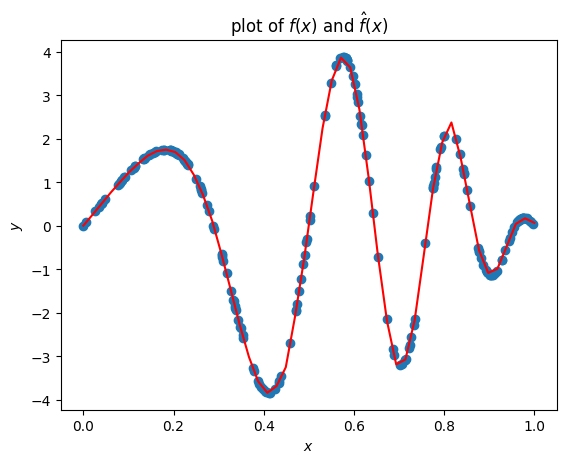

In [9]:
%matplotlib inline
import torch 
import matplotlib.pyplot as plt
import numpy as np
from torch import nn

class simpleNet(nn.Module):
    def __init__(self,input,output):
        super(simpleNet, self).__init__()
        self.linear1=nn.Linear(in_features=input, out_features=200)
        self.relu1=nn.ReLU()
        self.linear2=nn.Linear(in_features=200, out_features=300)
        self.relu2=nn.ReLU()
        self.linear3=nn.Linear(in_features=300, out_features=output)
    
    def forward(self, x):
        x=self.linear1(x)
        x=self.relu1(x)
        x=self.linear2(x)
        x=self.relu2(x)
        x=self.linear3(x)
        return x
if __name__=='__main__':
    

    d = 1
    n = 200
    X = torch.rand(n,d)
    iterm=50000
    y = 4 * torch.sin(np.pi * X) * torch.cos(6*np.pi*X**2)
    print(X.shape, y.shape)
 
################################################################
    net=simpleNet(input=d,output=d)
    loss_fn=nn.MSELoss()
    opt=torch.optim.Adam(params=net.parameters(),lr=0.01)
    for epoch in range(iterm):
         
            y_pred=net.forward(X)
            loss=loss_fn(y_pred,y)
            opt.zero_grad()
            loss.backward()
            opt.step()#更新权参、偏参
    
    X_grid = torch.from_numpy(np.linspace(0,1,50)).float().view(-1, d)
    y_hat = net(X_grid)
    plt.scatter(X.numpy(), y.numpy())
    plt.plot(X_grid.detach().numpy(), y_hat.detach().numpy(), 'r')
    plt.title('plot of $f(x)$ and $\hat{f}(x)$')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.show()

Sequential
---
除了使用创建modle类，再进行模型训练方法，也可以通过Sequenltal将模型串联，开始运算，但这种方式正规性不强，与tensorflow类似。
但是可以将Sequential集成到modle类中，实现序列包装，并在forwrd中直接调用，可以避免出错。

```python
class Net(nn.Module):
    def __init__(self, input_num, hidden_num, output_num):
        super(Net, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_num, hidden_num),
            nn.ReLU(),
            nn.Linear(hidden_num, output_num),
            nn.ReLU()
        )

    def forward(self, input):
        return self.net(input)
 
```
__init__ 方法中不为每一层显式地创建一个实例类层，同时在forward中直接调用Squential对象进行运算即可。

Many times, we want to compose Modules together. torch.nn.Sequential provides a good interface for composing simple modules.

## 实验
### 实验1 多元函数
在以上案例基础上，进一步实现多元回归的神经网络，包括
1. 数据获取
2. 数据观察
3. 对数据的标准化
4. 实现mini-batch载入
5. 通过train、test数据划分验证数据
6. 结合之前知识，实验模型优化
总之，实现一个完整的面向数值多元数据的神经网络构建流程

参考
* [神经网络多元回归](https://blog.csdn.net/qq_39567427/article/details/111935833)

In [10]:
!pip install torchsummary

载入数据，进行基本数据观察，数据来源于sklearn

----
注意层数与神经元确定个数：

[参考](https://zhuanlan.zhihu.com/p/100419971)

In [21]:
from sklearn.datasets import fetch_openml


from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from torch import nn
import torch
 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
from sklearn.preprocessing import scale
from torchsummary import summary
from matplotlib.font_manager import FontProperties

class MyNet(nn.Module):
    def __init__(self,input,output) -> None:
        super(MyNet, self).__init__()
        self.nn=nn.Sequential(
            nn.Linear(in_features=13,out_features=15),
            nn.ReLU(),
            nn.Linear(in_features=15,out_features=15),
            nn.ReLU(),
            nn.Linear(in_features=15,out_features=1),
            nn.ReLU()
        )
        #self.linear1=nn.Linear(in_features=13,out_features=20)
        #self.relu1=nn.ReLU()
        #self.linear2=nn.Linear(in_features=20,out_features=1)
        #self.relu2=nn.ReLU()
        
    def forward(self,x):
        return self.nn(x)
        #x=self.linear1(x)
        #x=self.relu1(x)
        #x=self.linear2(x)
        #x=self.relu2(x)
        
        return x

if __name__ == '__main__':

    boston = fetch_openml(data_id=531)
    #X, y = boston.data, boston.target
    print("载入数据tpye",type(boston))
    #获取数据键
    print(boston.keys())
    #print("数据集描述：",boston['DESCR'])
    print("自变量多元数据：")
    print(boston['feature_names'])
    print(boston['data'][0:1])
    #print("因变量：")
    #print(boston['target'])
    ################################################################
    #数据划分#
    x=boston['data'].values
    print("自变量数据类型：",type(x),"数据形状：",x.shape)
    y=boston['target'].values.reshape(-1,1)
    print("因变量数据类型：",type(y),"数据形状：",y.shape)
    ################################################################
    #数据预处理#
    ## 1. 标准化因变量#，在此标准化非常重要，没有标准化得到模型基本不能使用
    scaler=StandardScaler()
    x=scaler.fit_transform(x)
    ## 2. 数据打乱顺序
    x,y=shuffle(x,y)
    ## 3. 划分train，test
    x_size=x.shape[0]
    train_size=int(x_size*0.6)
    x_train,x_test,y_train,y_test=x[0:train_size,:],x[train_size:,:],y[0:train_size,:],y[train_size:,:]
    print("训练集形状",x_train.shape,y_train.shape)
    print("测试集形状",x_test.shape,y_test.shape)
    #数据载入tensor
    ## 1.转换numpy到tensor张量
    x_train =torch.from_numpy(x_train)
    y_train =torch.from_numpy(y_train)
    x_test =torch.from_numpy(x_test)
    y_test =torch.from_numpy(y_test)
    ## 判断cuda是否可用，选择gpu或cpu载入数据处理
    device="cuda" if torch.cuda.is_available() else "cpu"
    x_train.to(device)
    y_train.to(device) 
    x_test.to(device) 
    y_test.to(device)
    x_train=x_train.to(torch.float32)
    y_train=y_train.to(torch.float32)
    x_test=x_test.to(torch.float32)
    y_test=y_test.to(torch.float32)
    ################################################################
    ## 1. 构建模型实例,注意要载入gpu或cpu中与数据对应,summary输出网络的结构信息
    net=MyNet(input=13,output=1).to(device)
    net.to(device)
    summary(net, input_size=(13,))
    
    ## 2.超参设置
    learning_rate=0.02
    epochs=20
    batch_size=20
    total_steps=int(x_train.shape[0]/batch_size)
    print("完成一个epoch，需要读取",total_steps,"个batchs")
    ## 3.创建损失函数，优化函数实例
    loss_fn=nn.MSELoss()
    opt=torch.optim.Adam(params=net.parameters(),lr=learning_rate)
    ## 4.创建list记录训练loss，以及最后的test loss，作为对比
    train_loss_list=[]
    test_loss_list=[]
    train_acc_list=[]
    test_acc_list=[]
    step_loss=[]
    ## 4.训练模型
    for step in range(epochs):#循环1000个epochs
        print("epoch：",step)
        for i in range(total_steps):#内部完成基于batch的一个epochs数据读取
            x_train_batch=x_train[step * batch_size:(step + 1) * batch_size, :]
            y_train_batch=y_train[step * batch_size:(step + 1) * batch_size, :]
       
 
          
            #y_train=y_train.to(torch.float32)
            #x_train=x_train.to(torch.float32)
            y_pred=net(x_train_batch)
            loss=loss_fn(y_pred,y_train_batch)
            #print(loss.cpu().detach().numpy())
            step_loss.append(loss.cpu().detach().numpy())#记录每一个batch的loss值
            opt.zero_grad()
            loss.backward()
            opt.step()
       
        train_loss=np.mean(step_loss)#计算每一个epoch的平均loss
        train_loss_list.append(train_loss)
        y_predict=net(x_test)
        test_loss=loss_fn(y_predict, y_test)
        test_loss_list.append(test_loss.cpu().detach().numpy())
  
        print("第",step,"个epoch")
        print("train loss:",train_loss)
        print("test loss:",test_loss)
        
    fig = plt.gcf()
    fig.set_size_inches(10, 5)

    plt.xlabel('Epochs', fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.plot(train_loss_list, 'blue', label='Train loss')
    plt.plot(test_loss_list, 'red', label='Test loss')
    plt.legend(loc='best')
    plt.title('Training and Test loss', fontsize=15)
    plt.show()
    ################################################################
    # 通过x_test预测数据并与实际值对比
    y_predict=net.forward(x_test)
    y_pred=y_predict.cpu().detach().numpy()
    y_t=y_test.cpu().detach().numpy()
    print(y_pred.shape)
    print(y_t.shape)
    predciton=np.arange(len(y_pred))
    print(predciton)
    fig = plt.gcf()
    fig.set_size_inches(10, 5)
    plt.scatter(predciton,y_pred,color='red')
    plt.scatter(predciton,y_t,color='blue')
    

载入数据tpye <class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
自变量多元数据：
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
      CRIM    ZN  INDUS CHAS    NOX     RM   AGE   DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.09   1  296.0     15.3   

       B  LSTAT  
0  396.9   4.98  
自变量数据类型： <class 'numpy.ndarray'> 数据形状： (506, 13)
因变量数据类型： <class 'numpy.ndarray'> 数据形状： (506, 1)
训练集形状 (303, 13) (303, 1)
测试集形状 (203, 13) (203, 1)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 15]             210
              ReLU-2                   [-1, 15]               0
            Linear-3                   [-1, 15]             240
              ReLU-4                   [-1, 15]               0
         

c:\Users\tom\.conda\envs\luck\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

### 实验1.1 多元回归函数 进阶

在pytorch实现多元回归函数基础上，对函数进行进一步优化，并上传kaggle

1. 使用pythroch 的 Dataloader数据包装器包装数据
2. 加入权重衰减
3. 加入dropout
4. 实现k折交叉验证

---

参考[权重衰减 dropout](https://tangshusen.me/Dive-into-DL-PyTorch/#/chapter03_DL-basics/3.13_dropout)

---
0. 首先应该进行数据划分，再进行dataset创建和dataloader处理，可采用sklearn中数据划分方法train_test_split
1. DataLoader Dataset

* Dataset的作用是通过Dataset将现有数据进行包装；
* 包装好的数据就可以被DataLoader调用，调用的方法中就包括确定批次batch-size，是否shuffle等，是否normalization
#### 1. DataSet DataLoader
1.1 Dataset

torch.utils.data.Dataset是代表这一数据的抽象类（也就是基类）。我们可以通过继承和重写这个抽象类实现自己的数据类，只需要定义__len__和__getitem__这个两个函数

如果在类中定义了__getitem__()方法，那么实例对象（假设为P）就可以这样P[key]取值。当实例对象做P[key]操作时，就会调用类中的__getitem__()方法。
* The __len__ function returns the number of samples in our dataset.
* The __getitem__ function loads and returns a sample from the dataset at the given index idx. 根据索引返回张量数据
 
[参考1](https://blog.csdn.net/He3he3he/article/details/105441083)

[参考2](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)

[magic method](https://zhuanlan.zhihu.com/p/329962624)

1.2 DataLoader

定义Dataset后，就可以将dataset实例喂给Dataloader，完成shuffer，batchsize工作，特别是batchsize，简化了批次夺取数据的代码。
Preparing your data for training with DataLoaders
The Dataset retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.

DataLoader is an iterable that abstracts this complexity for us in an easy API.

We have loaded that dataset into the DataLoader and can iterate through the dataset as needed. Each iteration below returns a batch of train_features and train_labels (containing batch_size=64 features and labels respectively). Because we specified shuffle=True, after we iterate over all batches the data is shuffled 

#### 2. weight_decay
权重衰减参考class1，简单就是通过在loss函数权参平方和值乘以超参/2，改善方程过拟合现象
> 权值衰减一直以来是一种经常被使用的抑制过拟合方法，该方法通过在学习过程中对大的权重进行惩罚，来抑制过拟合。
**很多过拟合就是因为权重参数取值过大照成的**


[参考](https://blog.csdn.net/program_developer/article/details/80867468)

L2正则化的目的就是为了让权重衰减到更小的值，在一定程度上减少模型过拟合的问题，所以权重衰减也叫L2正则化。

对应公式：

$$C=C_0+\frac{\lambda}{2} \times \sum_w {w^2} \cdots  (1)$$

其中$C,C_0$分别为原误差函数、更新后误差函数$\sum_w {w^2}$为所有层中权参和,n为训练集数

pytorch中通过在优化函数中指定weight_decay超参的值就可以实现L2正则化
```python
optimizer = torch.optim.SGD(params=net.parameters(), lr=lr, weight_decay=wd)
```
如果只想针对某些参数，分别为它们构造一个优化器实例即可：
```python
optimizer_w = torch.optim.SGD(params=[net.weight], lr=lr, weight_decay=wd) # 对权重参数衰减
optimizer_b = torch.optim.SGD(params=[net.bias], lr=lr)  # 不对偏差参数衰减
```

---

#### 3. Dropout
pytorch中推荐使用 nn.Dropout，而不使用nn.functional.dropout函数。因为一般只有训练时才使用 Dropout，在验证或测试时不需要使用 Dropout。使用 nn.Dropout时，如果调用 model.eval() ，模型的 Dropout 层都会关闭；但如果使用 nn.functional.dropout，在调用 model.eval() 时，不会关闭 Dropout。
> * [参考](https://zhuanlan.zhihu.com/p/575456981)


----
 **同优化前后的多元函数对比，可以发现过拟合现象得到了很大改善**


In [46]:
def loss_fig(trian_loss_list,test_loss_list):       
        fig = plt.gcf()
        fig.set_size_inches(10, 5)

        plt.xlabel('Epochs', fontsize=15)
        plt.ylabel('Loss', fontsize=15)
        plt.plot(train_loss_list, 'blue', label='Train loss')
        plt.plot(test_loss_list, 'red', label='Test loss')
        plt.legend(loc='best')
        plt.title('Training and Test loss', fontsize=15)
        plt.show()

In [21]:
from sklearn.datasets import load_boston
from torch.utils.data import Dataset, DataLoader
import torch 
import torch.nn as nn 
import torch.functional as F
from sklearn.model_selection import train_test_split as split
import numpy as np 
from sklearn.preprocessing import StandardScaler

class MyNet2(nn.Module):
    def __init__(self,input,hidden,output,drop_p=0.5):
        super(MyNet2,self).__init__()
        
        self.l1=nn.Linear(input,hidden)
        self.drop1=nn.Dropout(p=drop_p)
        self.r1=nn.ReLU()
        self.l2=nn.Linear(hidden,hidden)
        self.drop2=nn.Dropout(p=drop_p)
        self.r2=nn.ReLU()
        self.l3=nn.Linear(hidden,output)
        self.drop3=nn.Dropout(p=drop_p)
        self.r3=nn.ReLU()
    
    def forward(self,x):
        x=self.l1(x)
        x=self.drop1(x)
        x=self.r1(x)
        x=self.l2(x) 
        x=self.drop2(x)
        x=self.r2(x)
        x=self.drop3(x)
        x=self.r3(x)
        return x
    
class MyDataset(Dataset):
    def __init__(self,data,target,device='cuda') -> None:
        super().__init__()
        self.len=len(data)
        self.data=torch.from_numpy(data).float().to(device)#注意数据类型转换
        self.target=torch.from_numpy(target).float().to(device)#注意数据类型转换
        
    def __len__(self) -> int:
        return self.len
    
    def __getitem__(self,index):
        return self.data[index],self.target[index]


        
if __name__ == '__main__':
    try:
        print(" 载入数据tpye",type(boston))
    except NameError:
        boston = load_boston()                                
        print("载入数据tpye",type(boston))

    #获取数据键
    print(boston.keys())
    #print("数据集描述：",boston['DESCR'])
    print("自变量多元数据：")
    print(boston['feature_names'])
    print(boston['data'][0:1])
    #print("因变量：")
    #print(boston['target'])
    ################################################################
    #因变量自变量提取#
    x=boston['data']
    print("the shape of x",x.shape)
    print("自变量数据类型：",type(x),"数据形状：",x.shape)
     
    y=boston['target'].reshape(-1,1)
    print("因变量数据类型：",type(y),"数据形状：",y.shape)
    ################################################################
    #对变量进行标准化
    scaler=StandardScaler()
    x=scaler.fit_transform(x)
    #数据划分#
    x_train,x_test,y_train,y_test=split(x,y,test_size=0.3,random_state=6)
    #############################使用DataSet包装数据，DataLoader读取数据###################################
    ################################并载入本机gpu或cpu################################`
    device="cuda" if torch.cuda.is_available() else "cpu"
    print("current device: " + device)
    train_data=MyDataset(x_train,y_train,device=device)
    test_data=MyDataset(x_test,y_test)
 
    print("数据集长度：{}".format(train_data.len))
    train_data_loader=DataLoader(train_data,shuffle=True,batch_size=20)
    test_data_loader=DataLoader(test_data,shuffle=False,batch_size=20)
    x,y=next(iter(train_data_loader))#iter调用train_data_loader de 调用__iter__()方法，该方法返回一个迭代器。然后，next()在该迭代器上调用__next__()方法以获得第一次迭代。再次运行next()将获得迭代器的第二项，依此类推。
    print("dataloder 处理后，一个batch size的长度：",len(x))
    ################################super parameters################################
    learning_rate=0.02
    epochs=100
    weight_decay=0.005
    ################################create modle,opt,loss_fn################################
    net=MyNet2(input=13,hidden=15,output=1)
    net.to(device)
    opt=torch.optim.Adam(params=net.parameters(),lr=learning_rate,weight_decay=weight_decay)
    loss_fn=nn.MSELoss()
    ################################create loss accury list###################################
    test_batch_loss=[]
    train_batch_loss=[]
    train_epoch_loss_list=[]
    test_epoch_loss_list=[]
    ################################训练模型，注意载入数据时候的dataloader 方法
    for epoch in range(epochs):
        for x_batch,y_batch in train_data_loader:# 每次读取一个batch，循环遍历一次epoch
  
            y_batch_pred=net(x_batch)
            loss=loss_fn(y_batch_pred,y_batch)
            opt.zero_grad()
            loss.backward()
            opt.step()
            train_batch_loss.append(loss.cpu().detach().numpy())
        train_epoch_loss=np.mean(train_batch_loss)
        train_epoch_loss_list.append(train_epoch_loss)
        
        
        net.eval()# 由于dropout存在在进行test的时候，需要关闭droput层以进行测试
        for x_batch,y_batch in test_data_loader:# 每次读取一个batch，循环遍历一次epoch

            y_batch_pred=net(x_batch)
            loss=loss_fn(y_batch_pred,y_batch)
            opt.zero_grad()
            loss.backward()
            opt.step()
            test_batch_loss.append(loss.cpu().detach().numpy())       
        
        test_epoch_loss=np.mean(test_batch_loss)
        test_epoch_loss_list.append(test_epoch_loss)

        if epoch%10==0:
           print("第{}次epoch的train loss为：{}".format(epoch,train_epoch_loss))
           print("第{}次epoch的test loss为：{}".format( epoch,test_epoch_loss))
           print("################################")
    loss_fig(train_epoch_loss_list,test_epoch_loss_list)
            
            
        
    

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


### 实验1.3 多元回归函数 category 类型自变量 embbding 层
实验目的：

在数值型输入数据基础上，加入category类型变量，并通过embedding层进行处理

category数据类型分为有序，ordinal；无序 normial 两种，在进行处理时都将其变换为one-hot编码

>In statistics, nominal data (also known as nominal scale) is a type of data that is used to label variables without providing any quantitative value. It is the simplest form of a scale of measure. Unlike ordinal data, nominal data cannot be ordered and cannot be measured.
In statistics, ordinal data are the type of data in which the data values follow a natural order. One of the most notable features of ordinal data is that the differences between the data values cannot be determined or are meaningless. Generally, the data categories lack the width representing the equal increments of the underlying attribute.
 
但由于one-hot编码矩阵过于稀疏，不利于计算，故需要embedding后再进入线性层。
*[参考](https://towardsdatascience.com/deep-learning-for-tabular-data-using-pytorch-1807f2858320)
*[Entity Embeddings of Categorical Variables](https://arxiv.org/pdf/1604.06737.pdf)
Categorical embeddings are very similar to word embeddings which are commonly used in NLP. The basic idea is to have a fixed-length vector representation of each category in the column. How this is different from a one-hot encoding is that instead of having a sparse matrix, using embeddings, we get a dense matrix for each category with similar categories having values close to each other in the embedding space. Hence, this process not only saves up memory (as the one-hot encoding for columns having too many categories can really blow up the input matrix, also it is a very sparse matrix) but also reveals intrinsic properties of the categorical variables.

---

实验数据：

[PyTorch NN with Embeddings and CatBoos](https://www.kaggle.com/code/vadbeg/pytorch-nn-with-embeddings-and-catboost)

预备知识 
Eembedding
Embedding 常在NLP中使用。类别变量、词语形成的矩阵，都是一个稀疏矩阵，不利于深度学习训练，故首先需要将其进行转换。

---
以下首先将无序、有序类别变量转换为矩阵，而后通过pytorch中embedding进行处理，并观察处理结果。

---
编码：

sklearn、pandas、tensor中都由one-hot编码方法，

--
Embedding
[pytorch embedding](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html#torch.nn.Embedding)

A simple lookup table that stores embeddings of a fixed dictionary and size.

This module is often used to store word embeddings and retrieve them using indices. The input to the module is a list of indices, and the output is the corresponding word embeddings.

embedding层简而言之就是实现了输入（批量 batch）矩阵的降维，通过矩阵点乘，使得输入的一个$m \times n$的$m$bich-size 长度为u$n$的稀疏矩阵，

In [9]:
from sklearn.preprocessing import LabelBinarizer,MultiLabelBinarizer
import numpy as np
f_features=np.array(['百合','月季','百合','玫瑰','水仙','桂花','玫瑰'])
one_hot=LabelBinarizer()
f_1_h=one_hot.fit_transform(f_features)
print(f_1_h)



[[0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]]


In [3]:
import torch
import torch.nn as nn
embedding=nn.Embedding(10,3)
input=torch.LongTensor([[1,2,4,5],[4,3,2,9]])
output=embedding(input)
print(output.shape)

torch.Size([2, 4, 3])


### 实验2 图像分类（from numpy）

#### 实验2.1 numpy 图像分类转换
该实验对之前numpy版本的深度学习网络进行pytorch实现，其中数据载入、建议使用之前的方法，而非pytorch方法，在进阶实验中换为pytorch的
Dataloder()

----

实验中，出现训练集loss下降，但测试集loss不变的情况，不知道是否是因为过拟合问题，同修改模型尝试解决问题。

----
实验记录
1. pytroch 中 CrossEntropyLoss 交叉熵误差函数输入值不能是one-hot，因为其会自动在内部进行变换，故必须输入1，3，5等原始分类数据标签
2. 输入CrossEntropyLoss中CrossEntropyLoss(pred,y),y实际值必须为long数据类型，而不能为float，可以显示通过y.long()进行转换
3. CrossEntropyLoss 中已经集成了softmax，故不定义softmax层

In [41]:
!pip install torchsummary

1
current device: cpu
torch.Size([1000, 784]) torch.Size([1000])
torch.Size([10000, 784]) torch.Size([10000])
10
第0次epoch的train loss为：2.230522394180298
第0次epoch的test loss为：2.1116092205047607
################################
第10次epoch的train loss为：0.8728312253952026
第10次epoch的test loss为：0.4580097198486328
################################
第20次epoch的train loss为：0.49312058091163635
第20次epoch的test loss为：0.4470714330673218
################################
第30次epoch的train loss为：0.3405017852783203
第30次epoch的test loss为：0.47483301162719727
################################
第40次epoch的train loss为：0.2593998908996582
第40次epoch的test loss为：0.5004660487174988
################################
第50次epoch的train loss为：0.20934610068798065
第50次epoch的test loss为：0.5214052796363831
################################
第60次epoch的train loss为：0.1754387468099594
第60次epoch的test loss为：0.5391399264335632
################################
第70次epoch的train loss为：0.15096743404865265
第70次epoch的test loss为：0.5543357133865356
#######

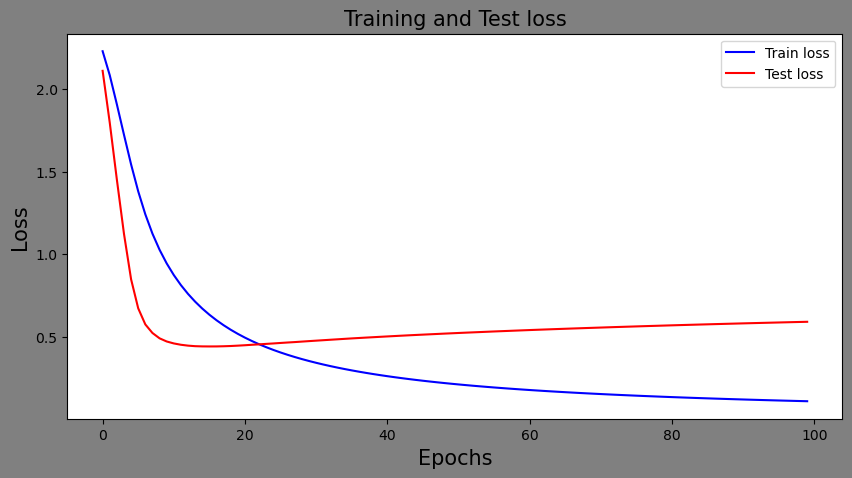

In [15]:
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
import load_data as l
from matplotlib import pyplot as plt
import numpy as np 
from torchsummary import summary
import torch.nn.functional as F
import sys, os 
from PIL import Image
sys.path.append(os.pardir)
import pickle

def img_show(img):
    """显示图像函数

    Args:
        img (np.array): 载入的图像,数组格式
    """
    pil_img=Image.fromarray(np.uint(img))
    pil_img.show()
    
class MNet(nn.Module):
    def __init__(self,input,hidden,output) -> None:
        super(MNet,self).__init__()
        
        self.linear1=nn.Linear(in_features=input,out_features=hidden)
        self.relu1=nn.ReLU()
        self.linear2=nn.Linear(in_features=hidden,out_features=hidden)
        self.relu2=nn.ReLU()
        self.linear3=nn.Linear(in_features=hidden,out_features=hidden)
        self.relu3=nn.ReLU()
        self.linear4=nn.Linear(in_features=hidden,out_features=output)
            
  
    def forward(self,x):
        x=self.linear1.forward(x)
        x=self.relu1.forward(x)
        x=self.linear2.forward(x)
        x=self.relu2.forward(x)
        x=self.linear3.forward(x)
        x=self.relu3.forward(x)
        x=self.linear4.forward(x)
        return x
    
    def accuracy(self, x, t):
        y = self.forward(x)
        y = torch.argmax(y, axis=1)
        #if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = torch.sum(y == t) / torch.FloatTensor(x.shape[0])
        return accuracy
class SimpleNet(nn.Module):
    def __init__(self,input,hidden,output) -> None:
        super(SimpleNet,self).__init__()
        self.l1=nn.Linear(input,hidden)
        self.l2=nn.Linear(hidden,hidden)
        self.l3=nn.Linear(hidden,output)
    def forward(self,x):
        x=F.relu(self.l1(x))
        x=F.relu(self.l2(x))
        x=self.l3(x)
        return x
    
if __name__ == '__main__':
    ################################数据载入、数据预处理################################
    #对所有数据进行 normalization
    stdsc=StandardScaler()
    (x_train,t_train),(x_test,t_test)=l.load_mnist(normalize=False ,one_hot_label=False,flatten=True)#flatten是否将矩阵变为一维数组
    
    
    x_train, t_train=x_train[:1000], t_train[:1000]
    #img_train=x_train[1]
    #img_show(img_train.reshape(28,28))#查看图象是否正确
    #print(t_train[1])
    img_test=x_test[5]
    img_show(img_test.reshape(28,28))#查看图象是否正确
    print(t_test[5])
    x_train=stdsc.fit_transform(x_train)
    x_test=stdsc.fit_transform(x_test)
    train_size=x_train.shape[0]# 获取行数
    
    step_loss=[]
    train_loss_list=[]
    test_loss_list=[]
    test_loss_list
    ################################numpy数据张量化，并载入本机gpu或cpu################################`
    device="cuda" if torch.cuda.is_available() else "cpu"
    print("current device: " + device)
    x_train=torch.from_numpy(x_train).to(torch.float32).to(device)
    t_train=torch.from_numpy(t_train).to(torch.float32).to(device)
    x_test=torch.from_numpy(x_test).to(torch.float32).to(device)
    t_test=torch.from_numpy(t_test).to(torch.float32).to(device)
    #t_train=t_train.view(-1,1)
    #t_test=t_test.view(-1,1)
    print(x_train.shape,t_train.shape)
    print(x_test.shape,t_test.shape)
    ## 超参设定
    learning_rate=0.001#学习率
    batch_size=100# 每批次随机选取100张图像
    epochs=100#循环epoch次数
    steps=int(x_train.shape[0]//batch_size)#完成一个epoch需要读取多少次batch
    print(steps)
    ################################网络实例构建################################
    #构建网络实例，注意在网络实例化时，权参、偏参也赋予了初始值
    net=SimpleNet(input=int(x_train.shape[1]),hidden=40,output=10)
    net.to(device)
    loss_fn=nn.CrossEntropyLoss()
    opt=torch.optim.Adam(params=net.parameters(),lr=learning_rate)
    #summary(net,input_size=(784,))
    ################################网络实例训练################################
    for epoch in range(epochs):
        #print("第{}次epoch".format(epoch))
        for step in range(steps):
            x=x_train[step*batch_size:(step+1)*batch_size,:]
            y=t_train[step*batch_size:(step+1)*batch_size]
            
            y_pred=net(x)
            
            
            #print(y.long())
            loss=loss_fn(y_pred,y.long())
            step_loss.append(loss.cpu().detach().numpy())
            opt.zero_grad()
            loss.backward()
            opt.step()
        train_loss=np.mean(step_loss)
        y_predict=net.forward(x_test)
        test_loss=loss_fn(y_predict,t_test.long())
        test_loss_list.append(test_loss.cpu().detach().numpy())
        train_loss_list.append( np.mean(step_loss))
        
        
        if epoch%10==0:
            print("第{}次epoch的train loss为：{}".format(epoch,train_loss))
            print("第{}次epoch的test loss为：{}".format( epoch,test_loss))
            print("################################")
        
    print("训练结束")
    ###############################################loss graph#################################################
    fig = plt.gcf()
    fig.set_size_inches(10, 5)
    fig.set_facecolor("gray")
    plt.xlabel('Epochs', fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.plot(train_loss_list, 'blue', label='Train loss')
    plt.plot(test_loss_list, 'red', label='Test loss')
    plt.legend(loc='best')
    plt.title('Training and Test loss', fontsize=15)
    plt.show()   
 

#### 实验2.2 基于 dataset dataloader 图像分类

数据来源于torchvision.datasets，已经经过预处理可以直接通过dataloader调用

---
##### 关于图片在python中的基本处理
* [深度学习NCHW和NHWC数据格式（由三维数据转换成一维数据的遍历方式）](https://dontla.blog.csdn.net/article/details/123141775?spm=1001.2101.3001.6650.1&utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-1-123141775-blog-108960632.pc_relevant_recovery_v2&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-1-123141775-blog-108960632.pc_relevant_recovery_v2&utm_relevant_index=2)
* [https://blog.csdn.net/m0_37673307/article/details/81271155](https://blog.csdn.net/m0_37673307/article/details/81271155)
不同于灰度图片，读取的图片的格式加入了通道维度，

---

实验笔记：

1. 在计算loss与accuracy时，应该停止梯度计算，主要是为了节约计算资源，防止内存爆炸。
2. 同样在读取loss，accracy值时，或者通过.cup().detch().numpy() 将数据转移到cpu，并脱离梯度计算detch，然后变为numpy；

使用loss += loss.detach()来获取不需要梯度回传的部分。或者使用loss.item()直接获得所对应的python数据类型。
> 简单理解就是.item()直接返回tensor的值，而不是对象

3. 由于数据量较大，可以使用from torch.utils.data import Subset，中Subset，保留索引对应的值，缩小数据量
[dataset 划分参考](https://lewtun.github.io/blog/til/nlp/pytorch/2021/01/24/til-slicing-torch-datasets.html)

In [1]:
!pip install OpenCV

ERROR: Could not find a version that satisfies the requirement OpenCV (from versions: none)
ERROR: No matching distribution found for OpenCV


In [ ]:
import torchvision
from torchvision.transforms import ToTensor
from torch.utils.data import Subset
train_ds=torchvision.datasets.MNIST('data/',train=True,transform=ToTensor(),download=True)
test_ds=torchvision.datasets.MNIST('data/',train=False,transform=ToTensor(),download=True)

 
import numpy as np


num_train_examples = 500
sample_ds = Subset(train_ds, np.arange(num_train_examples))
assert len(sample_ds) == num_train_examples
print(len(sample_ds))
train_data=enumerate(train_ds)
for  bitch_idx,(x_train,y_train) in train_data:
     print("批次",bitch_idx)
     print("########################")
     print("一个批次对应数据量： ",x_train.shape)
     print("因变量：",y_train)
     break
x_train=torch.utils.data.DataLoader(train_ds,batch_size=20,shuffle=True)
for x,y in x_train:
     print(x.shape)
     print(y)
     break

current device: cpu
一个train epoch中数据长度 500
一个test epoch中数据长度 500
##############第0次epoch#################
train loss为：2.0203192234039307
test loss为：1.7776832580566406
train accuracy为：32.6%
test accuracy为：60.199999999999996%
##############第10次epoch#################
train loss为：0.006572850979864597
test loss为：0.29917609691619873
train accuracy为：100.20040079999033%
test accuracy为：84.16673107332748%
##############第20次epoch#################
train loss为：0.0011324522783979774
test loss为：0.3448847532272339
train accuracy为：100.2004008016032%
test accuracy为：84.56913747654991%
##############第30次epoch#################
train loss为：0.0004648100584745407
test loss为：0.37660616636276245
train accuracy为：100.2004008016032%
test accuracy为：84.3691366733467%
##############第40次epoch#################
train loss为：0.00025330798234790564
test loss为：0.3952004909515381
train accuracy为：100.2004008016032%
test accuracy为：84.1683374733467%
***********************fin! good luck!*******************************
The final 

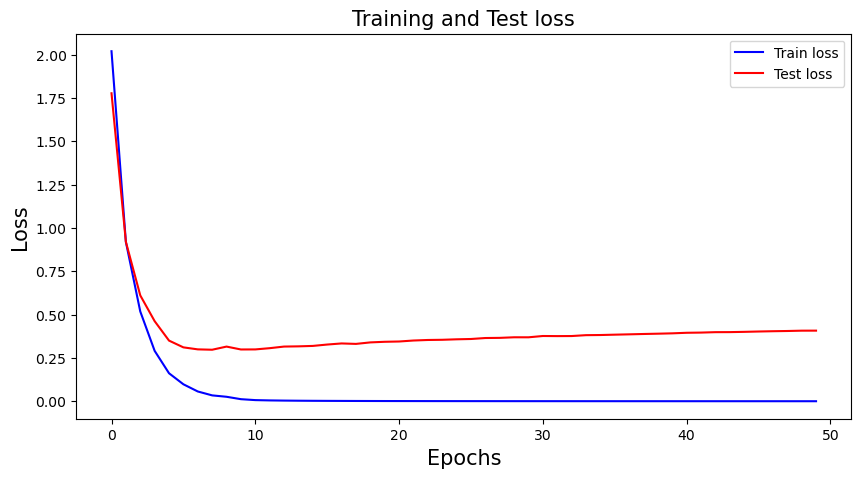

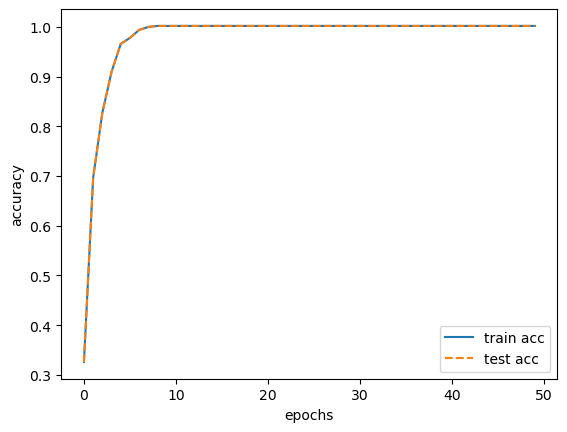

In [16]:
import torch
import torch.nn as nn
import myfucntion.Function as f
from importlib import reload
from sklearn.preprocessing import StandardScaler
#import load_data as l
from matplotlib import pyplot as plt
import numpy as np 
from torchsummary import summary
import torch.nn.functional as F
import torchvision
from torchvision.transforms import ToTensor
reload(f)
 
class MNet(nn.Module):
    def __init__(self,input,hidden,output) -> None:
        super(MNet,self).__init__()
        
        self.linear1=nn.Linear(in_features=input,out_features=hidden)
        self.relu1=nn.ReLU()
        self.linear2=nn.Linear(in_features=hidden,out_features=hidden)
        self.relu2=nn.ReLU()
        self.linear3=nn.Linear(in_features=hidden,out_features=hidden)
        self.relu3=nn.ReLU()
        self.linear4=nn.Linear(in_features=hidden,out_features=output)
            
  
    def forward(self,x):
        x=x.view(-1,28*28)
        x=self.linear1(x)
        x=self.relu1(x)
        x=self.linear2(x)
        x=self.relu2(x)
        x=self.linear3(x)
        x=self.relu3(x)
        x=self.linear4(x)
        return x
    


if __name__ == '__main__':
    ################################数据载入、数据预处理################################
    train_ds=torchvision.datasets.MNIST('data/',train=True,transform=ToTensor(),download=False)
    test_ds=torchvision.datasets.MNIST('data/',train=False,transform=ToTensor(),download=False)
    # 缩减数据量
    num_train_examples = 500
    num_test_examples  = 300
    train_ds = Subset(train_ds, np.arange(num_train_examples))
    test_ds = Subset(test_ds, np.arange(num_train_examples))
    # 通过dataloader进行处理
    train_data=torch.utils.data.DataLoader(train_ds,batch_size=20,shuffle=True)
    test_data=torch.utils.data.DataLoader(test_ds,batch_size=20,shuffle=False)
   

    train_loss_list=[]
    test_loss_list=[]
    train_correct_list=[]
    test_correct_list=[]
    ################################numpy数据张量化，并载入本机gpu或cpu################################`
    device="cuda" if torch.cuda.is_available() else "cpu"
    print("current device: " + device)
 
 
    ## 超参设定
    learning_rate=0.001#学习率
    batch_size=20# 每批次随机选取100张图像
    epochs=50#循环epoch次数
 
    ################################网络实例构建################################
    #构建网络实例，注意在网络实例化时，权参、偏参也赋予了初始值
    net=MNet(input=28*28,hidden=200,output=10)
    net.to(device)
    loss_fn=nn.CrossEntropyLoss()
    opt=torch.optim.Adam(params=net.parameters(),lr=learning_rate)
    #summary(net,input_size=(784,))
    ################################网络实例训练################################
    train_len=len(train_data.dataset)
    print("一个train epoch中数据长度",train_len)
    test_len=len(test_data.dataset)
    print("一个test epoch中数据长度",test_len)
    train_correct=0
    test_correct=0
    for epoch in range(epochs):
        #print("第{}次epoch".format(epoch))
        step_loss=[]
        step_correct=[]
        for x,y in train_data:
            x,y=x.to(device),y.to(device)
            pred=net(x)
            loss=loss_fn(pred,y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            step_loss.append(loss.cpu().detach().numpy())
            #step_correct.append((pred.argmax(dim=1)==y).type(torch.float).sum().item())
            train_correct+=(pred.argmax(1)==y).type(torch.float).sum().item()
            #step_correct=(pred.argmax(1)==y).type(torch.float).sum().item()
            #print(step_correct/20,"%")
        train_loss=np.mean(step_loss)
        train_loss_list.append( train_loss)
        #train_correct=np.sum(step_correct)/train_len
        train_correct/=train_len
        train_correct_list.append( train_correct)
        
        
        with torch.no_grad():# since we're not training, we don't need to calculate the gradients for our outputs
            for x,y in test_data:
                x,y=x.to(device),y.to(device)
                pred=net(x)
                loss=loss_fn(pred,y)
                step_loss.append(loss.cpu().detach().numpy())
                test_correct+=(pred.argmax(dim=1)==y).type(torch.float).sum().item()
                
        test_loss=np.mean(step_loss)
        test_loss_list.append(test_loss)
        #test_correct=np.sum(step_correct)/test_len
        test_correct/=test_len
        test_correct_list.append( train_correct)
        
        
        
        if epoch%10==0 :
            print("##############第{}次epoch#################".format(epoch))
            print("train loss为：{}".format(train_loss))
            print("test loss为：{}".format( test_loss))
            print("train accuracy为：{}%".format(train_correct*100))
            print("test accuracy为：{}%".format( test_correct*100))
        if epoch==epochs-1:
            print("***********************fin! good luck!*******************************")
            print("The final train loss：{}".format(train_loss))
            print("The final train  loss为：{}".format( test_loss))
            print("The final train accuracy：{}%".format( train_correct*100))
            print("The final test accuracy：{}%".format( test_correct*100))
    f.loss_fig(train_loss_list,test_loss_list)
    f.accuracy_fig(train_correct_list,test_correct_list)
    

In [11]:
print(epochs)

50


### 实验2.3 优化实验2.2 

实验目标：

* 引入weight decay，dropot 降低自拟合
* 使用batch normalization
* 优化学习率，学习率衰减

---
1. batch normalization

* [PyTorch——Batch Normalization（批量归一化）](https://blog.csdn.net/beilizhang/article/details/115416708)

* [Batch Normalization and Dropout in Neural Networks with Pytorch](https://towardsdatascience.com/batch-normalization-and-dropout-in-neural-networks-explained-with-pytorch-47d7a8459bcd)

[参考](https://towardsdatascience.com/weight-decay-and-its-peculiar-effects-66e0aee3e7b8)

pytorch中，batch normalization也是对应加入一层，不同于dropout等层的是，对应不同维度数据（例如3维度彩色图片），Pytorch中nn模块定义的BatchNorm1d和BatchNorm2d类分别用于全连接层和卷积层，都需要指定输入的num_features参数值。
 
* nn.BatchNorm1d——矩阵张量 Liner(intout,output)->nn.BatchNorm1d(output)->Relu()
* nn.BatchNorm2d——3d张量（图片）


----

实验结果：

> 未优化前loss accuracy：

The final train loss：0.00016342761227861047

The final train  loss：0.4075630307197571

The final train accuracy：100.2004008016032%

The final test accuracy：84.3683366733467%


---

实验结果
1. 加入dropout层
* (p=0.5)
***********************fin! good luck!*******************************
The final train loss：0.039016470313072205
The final train  loss为：0.5459088683128357
The final train accuracy：99.19759359998717%
The final test accuracy：81.16793663974346%
>loss，accuracy反而没有改善，过拟合有所减低

* p=0.2 效果很好，过拟合有所减轻，同时精度上升

The final train loss：0.004101796541363001
The final train  loss为：0.4097197651863098
The final train accuracy：100.1999951887904%
The final test accuracy：84.56713263810506%

>结论，加入dropout，过拟合现象有所改善，但模型拟合度降低

2. 加入L2正则化，实现weight decay

* weight_decay=0.001
> 一般而言，weigt_decay由pytorch自动设置，不需要调整
The final train loss：0.05548945069313049
The final train  loss为：0.32841596007347107
The final train accuracy：100.19919919837757%
The final test accuracy：83.56632626369861%
The final test accuracy：81.36192625570175%
>结论，加入weight decay，过拟合现象进一步所改善，但模型拟合度进一步降低

3. 加入batch normalization：

> 提升效果一般

The final train loss：0.012145309709012508
The final train  loss为：0.39998507499694824
The final train accuracy：99.79920000160321%
The final test accuracy：81.7651278781563%

current device: cpu
一个train epoch中数据长度 500
一个test epoch中数据长度 500
##############第0次epoch#################
train loss为：1.2604891061782837
test loss为：1.1003929376602173
train accuracy为：65.2%
test accuracy为：74.4%
##############第10次epoch#################
train loss为：0.016323095187544823
test loss为：0.24605834484100342
train accuracy为：100.19999839679676%
test accuracy为：84.36873584772428%
##############第20次epoch#################
train loss为：0.027529744431376457
test loss为：0.3789593577384949
train accuracy为：99.7996007999968%
test accuracy为：80.76593025568903%
##############第30次epoch#################
train loss为：0.05617909133434296
test loss为：0.35755500197410583
train accuracy为：98.59879598878078%
test accuracy为：82.967530236505%
##############第40次epoch#################
train loss为：0.00851162988692522
test loss为：0.2928030490875244
train accuracy为：100.1999992016032%
test accuracy为：85.7707374797499%
***********************fin! good luck!*******************************
The final train loss：0.012145309

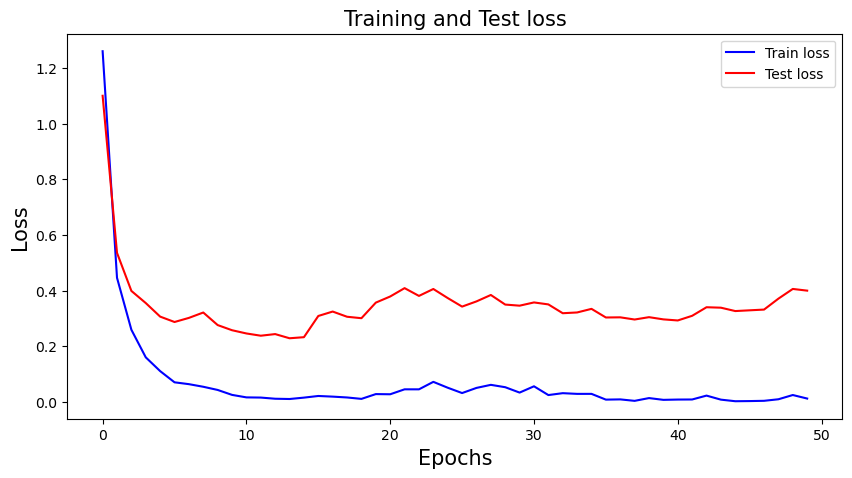

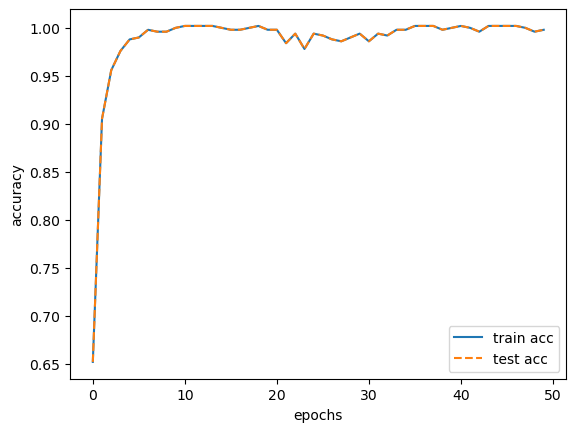

In [18]:
import torch
import torch.nn as nn
import myfucntion.Function as f
from importlib import reload
from sklearn.preprocessing import StandardScaler
#import load_data as l
from matplotlib import pyplot as plt
import numpy as np 
from torchsummary import summary
from torch.utils.data import Subset
import torch.nn.functional as F
import torchvision
from torchvision.transforms import ToTensor
reload(f)
 
class MNet1(nn.Module):
    def __init__(self,input,hidden,output) -> None:
        super(MNet1,self).__init__()
        
        self.linear1=nn.Linear(in_features=input,out_features=hidden)
        self.relu1=nn.ReLU()
        self.linear2=nn.Linear(in_features=hidden,out_features=hidden)
        self.relu2=nn.ReLU()
        self.linear3=nn.Linear(in_features=hidden,out_features=hidden)
        self.relu3=nn.ReLU()
        self.linear4=nn.Linear(in_features=hidden,out_features=output)
            
  
    def forward(self,x):
        x=x.view(-1,28*28)
        x=self.linear1(x)
        x=self.relu1(x)
        x=self.linear2(x)
        x=self.relu2(x)
        x=self.linear3(x)
        x=self.relu3(x)
        x=self.linear4(x)
        return x
    
class MNet2(nn.Module):
    """加入drop out层

    Args:
        nn (_type_): _description_
    """
    def __init__(self,input,hidden,output,drop_p=0.5) -> None:
        """_summary_

        Args:
            input (_type_): _description_
            hidden (_type_): _description_
            output (_type_): _description_
            drop_p (float, optional): dropout层中屏蔽神经网络节点的概率. Defaults to 0.5.
        """
        super(MNet2,self).__init__()
        
        self.linear1=nn.Linear(in_features=input,out_features=hidden)
        self.d1=nn.Dropout(p=drop_p)
        self.relu1=nn.ReLU()
        self.linear2=nn.Linear(in_features=hidden,out_features=hidden)
        self.d2=nn.Dropout(p=drop_p)
        self.relu2=nn.ReLU()
        self.linear3=nn.Linear(in_features=hidden,out_features=hidden)
        self.d3=nn.Dropout(p=drop_p)
        self.relu3=nn.ReLU()
        self.linear4=nn.Linear(in_features=hidden,out_features=output)
            
  
    def forward(self,x):
        x=x.view(-1,28*28)
        x=self.linear1(x)
        x=self.d1(x)
        x=self.relu1(x)
        x=self.linear2(x)
        x=self.d2(x)
        x=self.relu2(x)
        x=self.linear3(x)
        x=self.d3(x)
        x=self.relu3(x)
        x=self.linear4(x)
        return x
class MNet3(nn.Module):
    """加入Batch normilization层

    Args:
        nn (_type_): _description_
    """
    def __init__(self,input,hidden,output) -> None:
        """_summary_

        Args:
            input (_type_): _description_
            hidden (_type_): _description_
            output (_type_): _description_
             
        """
        super(MNet3,self).__init__()
        
        self.linear1=nn.Linear(in_features=input,out_features=hidden)
        self.n1=nn.BatchNorm1d(hidden)
        self.relu1=nn.ReLU()
        self.linear2=nn.Linear(in_features=hidden,out_features=hidden)
        self.n2=nn.BatchNorm1d(hidden)
        self.relu2=nn.ReLU()
        self.linear3=nn.Linear(in_features=hidden,out_features=hidden)
        self.n3=nn.BatchNorm1d(hidden)
        self.relu3=nn.ReLU()
        self.linear4=nn.Linear(in_features=hidden,out_features=output)
            
  
    def forward(self,x):
        x=x.view(-1,28*28)
        x=self.linear1(x)
        x=self.n1(x)
        x=self.relu1(x)
        x=self.linear2(x)
        x=self.n2(x)
        x=self.relu2(x)
        x=self.linear3(x)
        x=self.n3(x)
        x=self.relu3(x)
        x=self.linear4(x)
        return x
if __name__ == '__main__':
    ################################数据载入、数据预处理################################
    train_ds=torchvision.datasets.MNIST('data/',train=True,transform=ToTensor(),download=False)
    test_ds=torchvision.datasets.MNIST('data/',train=False,transform=ToTensor(),download=False)
    # 缩减数据量
    num_train_examples = 500
    num_test_examples  = 300
    train_ds = Subset(train_ds, np.arange(num_train_examples))
    test_ds = Subset(test_ds, np.arange(num_train_examples))
    # 通过dataloader进行处理
    train_data=torch.utils.data.DataLoader(train_ds,batch_size=20,shuffle=True)
    test_data=torch.utils.data.DataLoader(test_ds,batch_size=20,shuffle=False)
   

    train_loss_list=[]
    test_loss_list=[]
    train_correct_list=[]
    test_correct_list=[]
    ################################numpy数据张量化，并载入本机gpu或cpu################################`
    device="cuda" if torch.cuda.is_available() else "cpu"
    print("current device: " + device)
 
 
    ## 超参设定
    learning_rate=0.001#学习率
    batch_size=20# 每批次随机选取100张图像
    epochs=50#循环epoch次数
    drop_p=0.2
    weight_decay=0.01
    ################################网络实例构建################################
    #构建网络实例，注意在网络实例化时，权参、偏参也赋予了初始值
    #net=MNet2(input=28*28,hidden=200,output=10,drop_p=drop_p)
    #net=MNet3(input=28*28,hidden=200,output=10)
    net=MNet3(input=28*28,hidden=200,output=10)
    net.to(device)
    loss_fn=nn.CrossEntropyLoss()
    opt=torch.optim.Adam(params=net.parameters(),lr=learning_rate)
    #summary(net,input_size=(784,))
    ################################网络实例训练################################
    train_len=len(train_data.dataset)
    print("一个train epoch中数据长度",train_len)
    test_len=len(test_data.dataset)
    print("一个test epoch中数据长度",test_len)
    train_correct=0
    test_correct=0
    for epoch in range(epochs):
        #print("第{}次epoch".format(epoch))
        step_loss=[]
        step_correct=[]
        for x,y in train_data:
            x,y=x.to(device),y.to(device)
            pred=net(x)
            loss=loss_fn(pred,y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            step_loss.append(loss.cpu().detach().numpy())
            #step_correct.append((pred.argmax(dim=1)==y).type(torch.float).sum().item())
            train_correct+=(pred.argmax(1)==y).type(torch.float).sum().item()
            #step_correct=(pred.argmax(1)==y).type(torch.float).sum().item()
            #print(step_correct/20,"%")
        train_loss=np.mean(step_loss)
        train_loss_list.append( train_loss)
        #train_correct=np.sum(step_correct)/train_len
        train_correct/=train_len
        train_correct_list.append( train_correct)
        
        
        with torch.no_grad():# since we're not training, we don't need to calculate the gradients for our outputs
            for x,y in test_data:
                x,y=x.to(device),y.to(device)
                pred=net(x)
                loss=loss_fn(pred,y)
                step_loss.append(loss.cpu().detach().numpy())
                test_correct+=(pred.argmax(dim=1)==y).type(torch.float).sum().item()
                
        test_loss=np.mean(step_loss)
        test_loss_list.append(test_loss)
        #test_correct=np.sum(step_correct)/test_len
        test_correct/=test_len
        test_correct_list.append( train_correct)
        
        
        
        if epoch%10==0 :
            print("##############第{}次epoch#################".format(epoch))
            print("train loss为：{}".format(train_loss))
            print("test loss为：{}".format( test_loss))
            print("train accuracy为：{}%".format(train_correct*100))
            print("test accuracy为：{}%".format( test_correct*100))
        if epoch==epochs-1:
            print("***********************fin! good luck!*******************************")
            print("The final train loss：{}".format(train_loss))
            print("The final train  loss为：{}".format( test_loss))
            print("The final train accuracy：{}%".format( train_correct*100))
            print("The final test accuracy：{}%".format( test_correct*100))
    f.loss_fig(train_loss_list,test_loss_list)
    f.accuracy_fig(train_correct_list,test_correct_list)